# Sheet9 Leonhard Moske


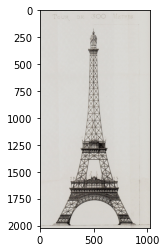

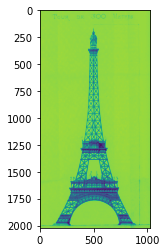

[8.69773026e+05 9.39307784e+04 5.30639988e+04 ... 7.35656673e+00
 6.74216748e+00 6.67534695e+00]


In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

eifelTower = img.imread("1024px-Entwurf_Eiffelturm_-_Stephan_Sauvestre_(1887).jpg")

plt.imshow(eifelTower)
plt.show()

eifelTowerSum = np.sum(eifelTower, axis=2)

plt.imshow(eifelTowerSum)
plt.show()


u, s, vh = np.linalg.svd(eifelTowerSum, full_matrices=True)



print(s) # 20 s

(2021, 2021) (1024,) (1024, 1024)


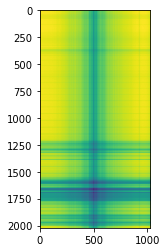

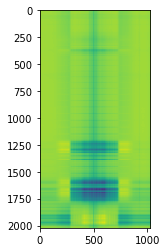

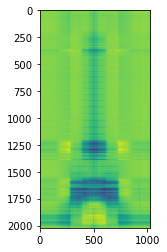

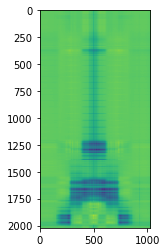

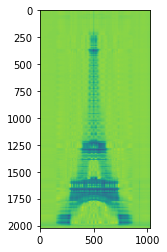

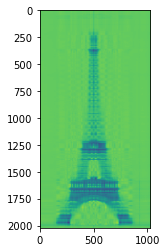

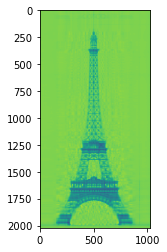

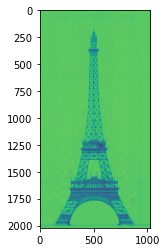

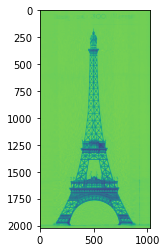

In [2]:
ks = [1,2,3,4,8,10,20,50,100]

print(np.shape(u),np.shape(s),np.shape(vh))

for k in ks:
    # scopy = s.copy()
    # scopy[scopy.argsort() < k] = 0
    # nimg = (u * scopy) @ vh
    
    nimg = np.matrix(u[:,:k]) * np.diag(s[:k]) * np.matrix(vh[:k,:])
    
    plt.imshow(nimg)
    plt.show()

## Exercise 29

In [16]:
import numpy as np

def singularVD(state, LA, LB):
        U ,S, V = np.linalg.svd(np.reshape(state, (2**int(LA), 2**int(LB))))
        return entropy(S)

    

# have to normalize wavefunctions

def entropy(eig):
    eig = eig[eig > 1.e-30]
    return -np.sum(eig**2 * np.log(eig**2))

def genC(L,chi):
        tensors = []

        tensors.append(np.random.normal(0,1,(2,chi)) * np.exp(1j*np.random.uniform(0,2*np.pi, (2,chi))))

        for i in range(L-2):
                tensors.append(np.random.normal(0,1,(2,chi,chi))* np.exp(1j*np.random.uniform(0,2*np.pi, (2,chi, chi))))

        tensors.append(np.random.normal(0,1,(2,chi))* np.exp(1j*np.random.uniform(0,2*np.pi, (2,chi))))

        c = tensors[0]

        for i in range(0,L -1):
                c = np.tensordot(c,tensors[i + 1], axes= [i + 1,1])

        return np.reshape(c, 2**L)

0.13317918852385133


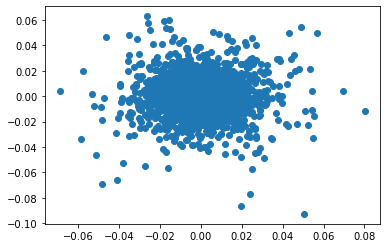

In [51]:
L = 12
chi = 6
coef = genC(L,chi) 
cNorm = coef/np.linalg.norm(coef)

import matplotlib.pyplot as plt
plt.scatter(np.real(coef/np.linalg.norm(coef)),np.imag(coef/np.linalg.norm(coef)))

print(entropy(singularVD(cNorm, L/2,L/2)))

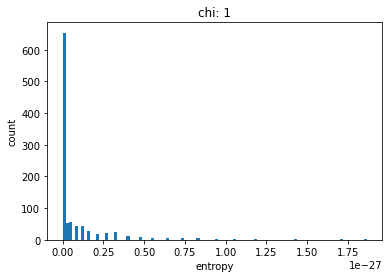

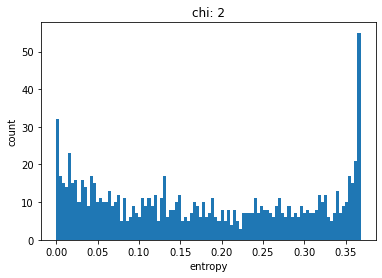

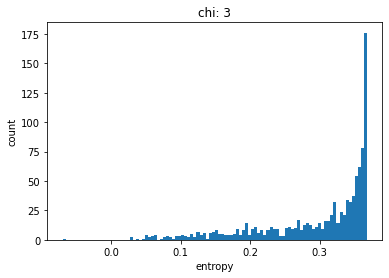

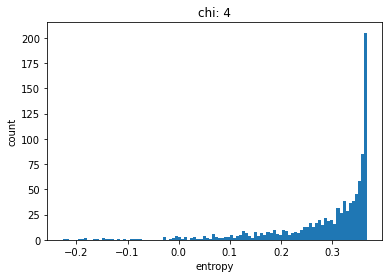

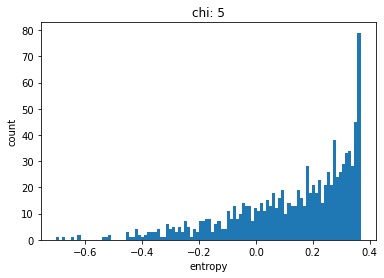

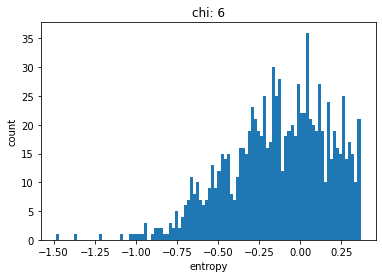

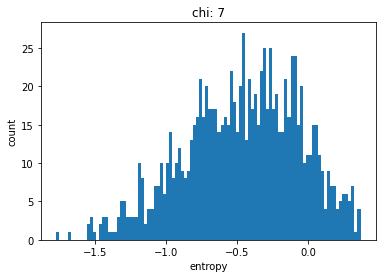

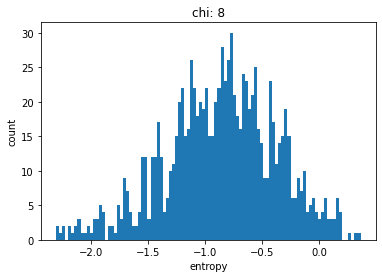

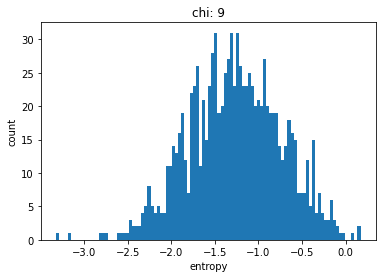

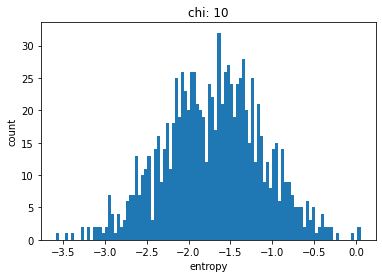

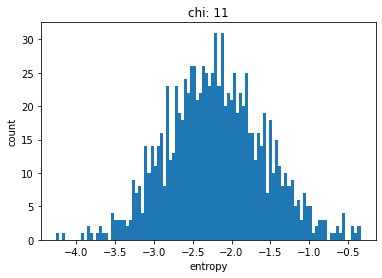

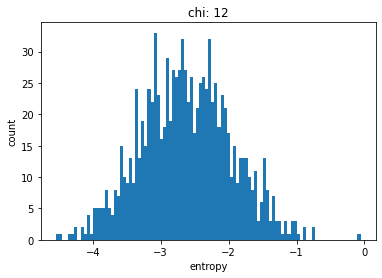

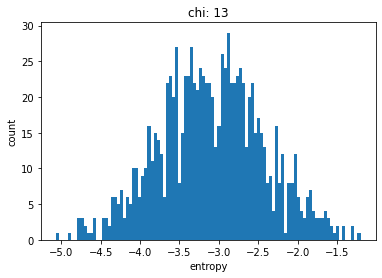

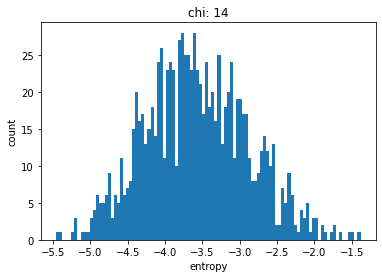

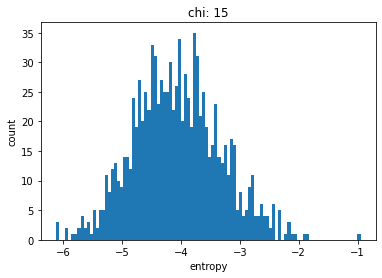

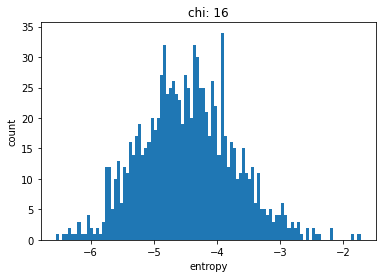

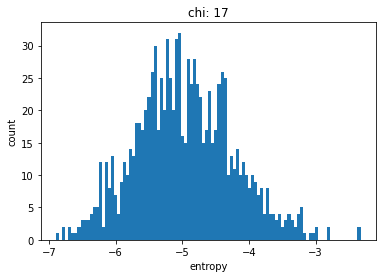

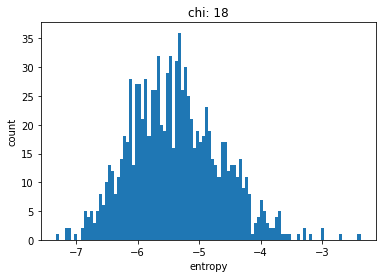

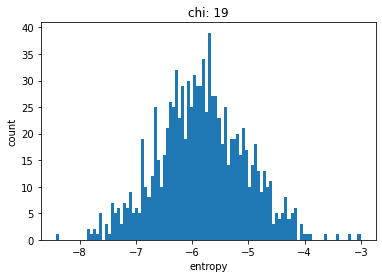

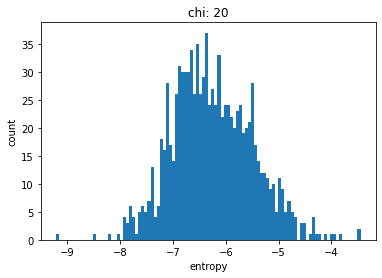

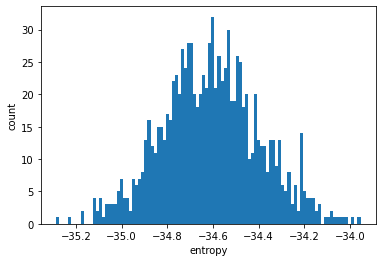

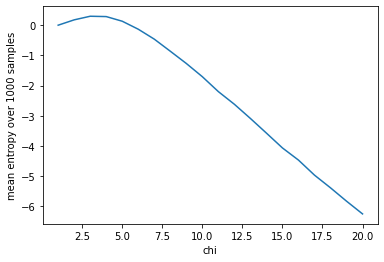

for a complex gaussian random wavevector we have a meantropy of: -34.609


In [60]:
meanEntro = []
for chi in range(1,21):
    entrops = []
    for i in range(1000):
        coef = genC(L,chi) 
        cNorm = coef/np.linalg.norm(coef)
        entrops = np.append(entrops, entropy(singularVD(cNorm, L/2,L/2)))
    meanEntro.append(np.mean(entrops))
    plt.hist(entrops, bins = 100)
    plt.xlabel("entropy")
    plt.ylabel("count")
    plt.title(f"chi: {chi}")
    plt.show()

entrops = []
for i in range(1000):
    coef = np.random.normal(0, 1, 2**L) * np.exp(1j*np.random.uniform(0,2*np.pi,2**L))
    cNorm = coef/np.linalg.norm(coef)
    entrops = np.append(entrops, entropy(singularVD(cNorm, L/2,L/2)))
plt.hist(entrops, bins = 100)
plt.xlabel("entropy")
plt.ylabel("count")
plt.show()

chis = [chi for chi in range(1,21)]
plt.plot(chis,meanEntro)
plt.ylabel("mean entropy over 1000 samples")
plt.xlabel("chi")
# plt.hlines(np.mean(entrops), 0,1,colors = "r")
plt.show()
print(f"for a complex gaussian random wavevector we have a meantropy of: {np.mean(entrops):.3f}")